In [5]:
from transformers import pipeline
import torch

from PIL import Image
import requests

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pipe = pipeline(task="image-to-image", model="caidas/swin2SR-lightweight-x2-64", device=device)

config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.18M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/152 [00:00<?, ?B/s]

In [6]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/cat.jpg"
image = Image.open(requests.get(url, stream=True).raw)

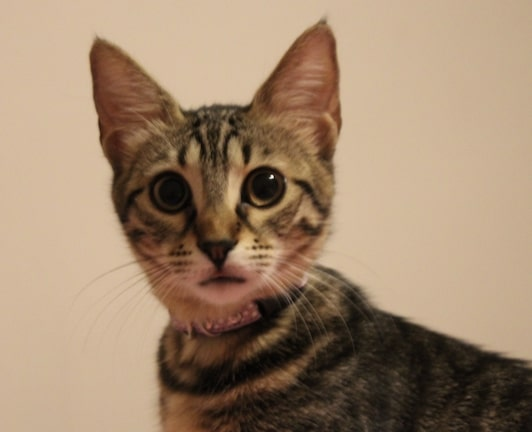

In [7]:
image

In [8]:
upscaled = pipe(image)

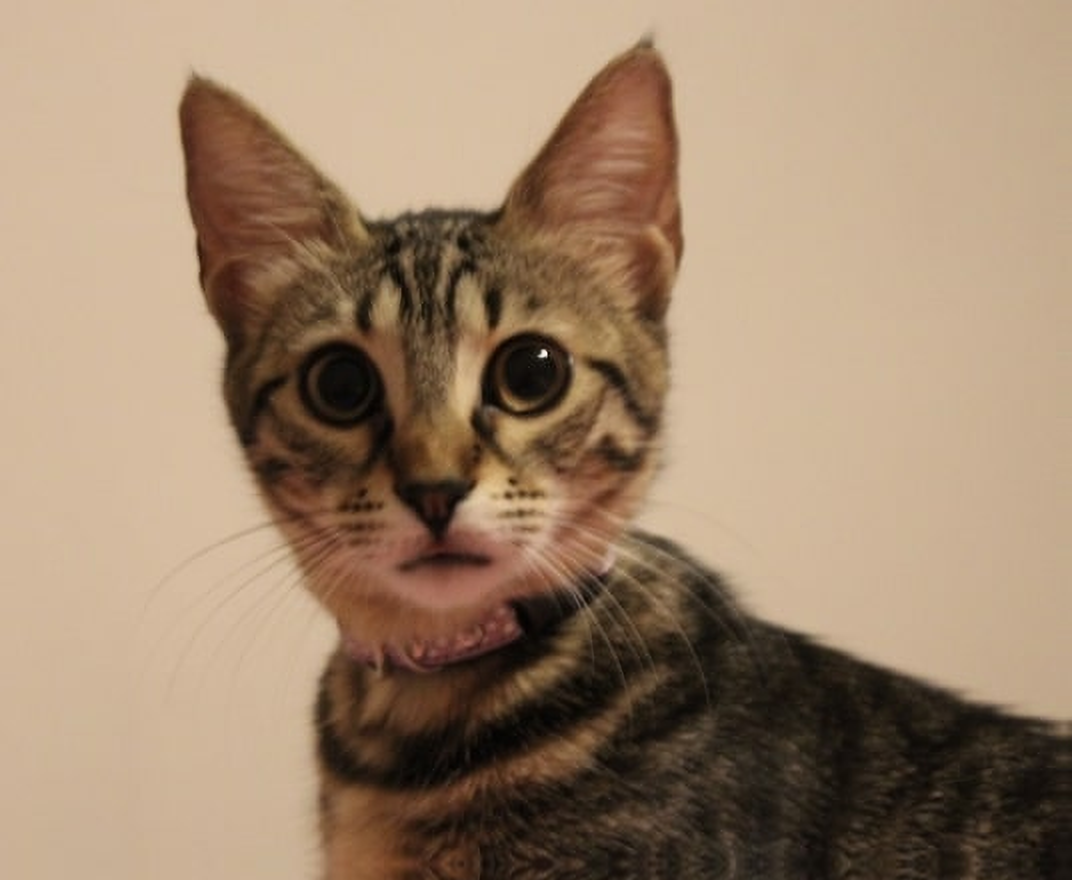

In [9]:
upscaled

# Super-resolution by Hand

In [10]:
from transformers import Swin2SRForImageSuperResolution, Swin2SRImageProcessor 

In [11]:
model = Swin2SRForImageSuperResolution.from_pretrained("caidas/swin2SR-lightweight-x2-64").to(device)
processor = Swin2SRImageProcessor("caidas/swin2SR-lightweight-x2-64")

In [12]:
pixel_values = processor(image, return_tensors="pt").pixel_values

In [13]:
pixel_values = pixel_values.to(device)

In [15]:
with torch.no_grad():
    outputs = model(pixel_values)

In [16]:
import numpy as np

In [23]:
output = outputs.reconstruction.data.squeeze().cpu().clamp_(0, 1).numpy()
output = np.moveaxis(output, source=0, destination=-1)
output = (output * 255.0).round().astype(np.uint8)

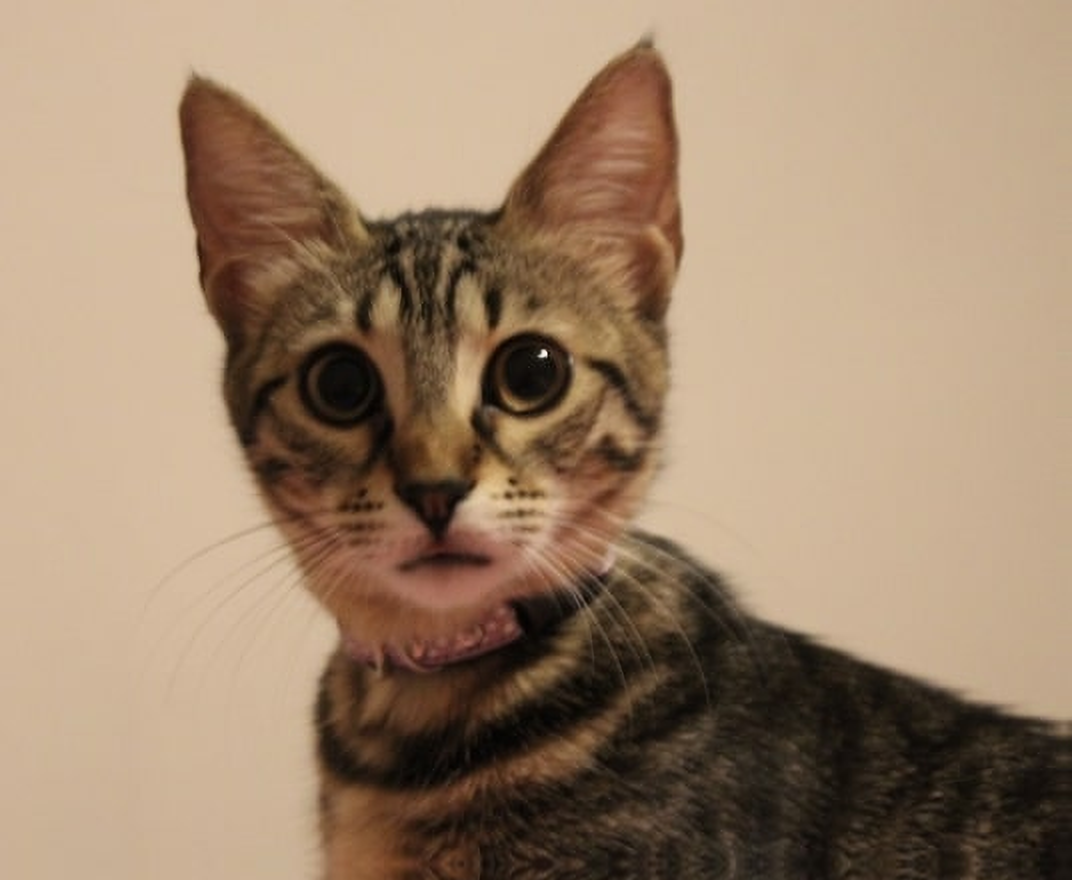

In [24]:
Image.fromarray(output)